# Case Study: How Does Bike-Share Navigate Speedy Success

## Analysis & Visualisation

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt 

In [2]:
datetime_cols = ['started_at', 'ended_at']
df = pd.read_csv('data/publictripdata_202303_202203.csv', parse_dates=datetime_cols)

In [3]:
print(f"Shape of dataframe: {df.shape}")
df.info()

Shape of dataframe: (6081641, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081641 entries, 0 to 6081640
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  duration_in_mins    float64       
 14  distance_km         float64       
 15  day_of_week         int64         
 16  day_of_week_named   object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(8)
memory usage: 788.8+ MB


In [4]:
# Change day_of_week to object
df['day_of_week'] = df['day_of_week'].astype(str)

In [5]:
# Drop column with negative or zero values in "duration_in_mins" and "distance_km"
df = df[df['duration_in_mins'] > 0]
df = df[df['distance_km'] > 0]

# Shape of dataframe 
print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (5694352, 17)


In [6]:
# Descriptive statistics 
cols = ['duration_in_mins', 'distance_km']
df[cols].describe()

,duration_in_mins,distance_km
count,5.694352e+06,5.694352e+06
mean,1.519268e+01,2.255319e+00
std,3.671176e+01,1.104050e+01
min,1.000000e+00,1.000000e-04
25%,5.000000e+00,1.004500e+00
50%,1.000000e+01,1.654200e+00
75%,1.700000e+01,2.865400e+00
max,3.435400e+04,9.814083e+03


In [7]:
# Descriptive statistics 
cols = ['rideable_type', 'member_casual', 'day_of_week_named']
df[cols].describe(include="O")

,rideable_type,member_casual,day_of_week_named
count,5694352,5694352,5694352
unique,3,2,7
top,electric_bike,member,Sat
freq,2943258,3472063,890666


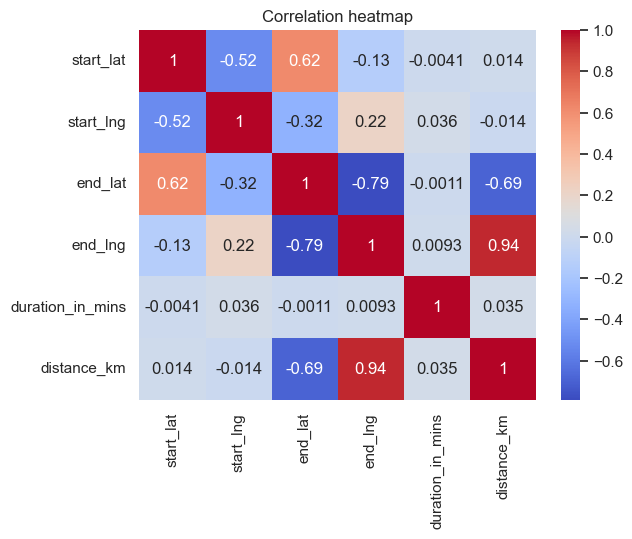

In [8]:
# Correlation 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

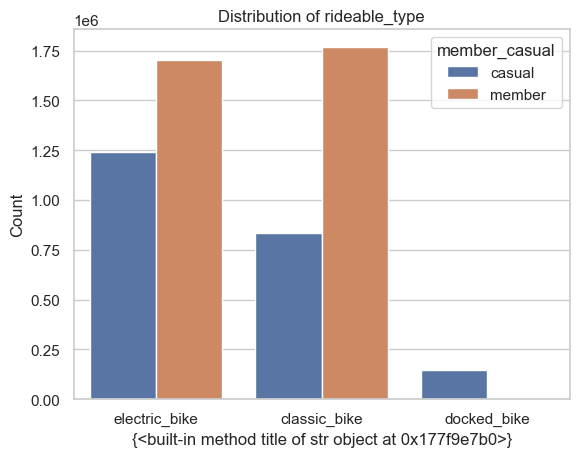

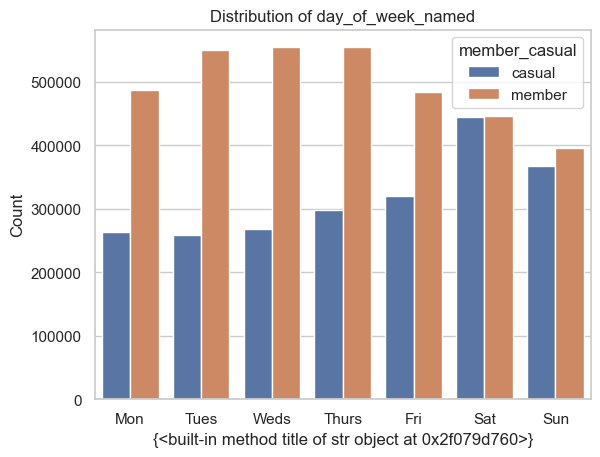

In [9]:
def plot_dist(data, x, hue=None, title=None, xlabel=None, ylabel=None, order=None):
    sns.countplot(x=x, hue=hue, data=data, order=order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

cat_cols = ['rideable_type', 'day_of_week_named']
for col in cat_cols:
    title = f"Distribution of {col}"
    if col == 'day_of_week_named':
        order = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
    else:
        order = None
    plot_dist(df, col, hue='member_casual', title=title, xlabel={col.title}, ylabel="Count", order=order)


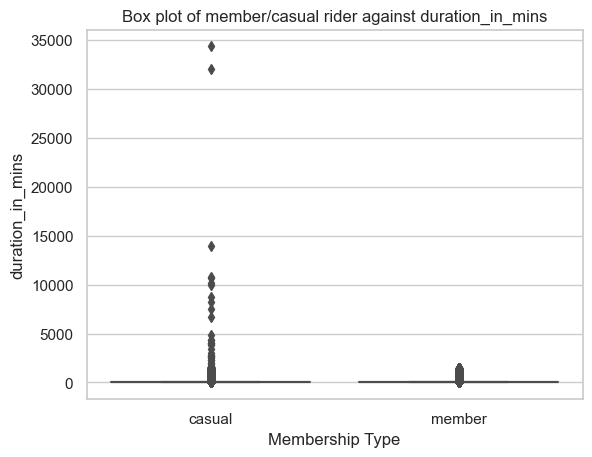

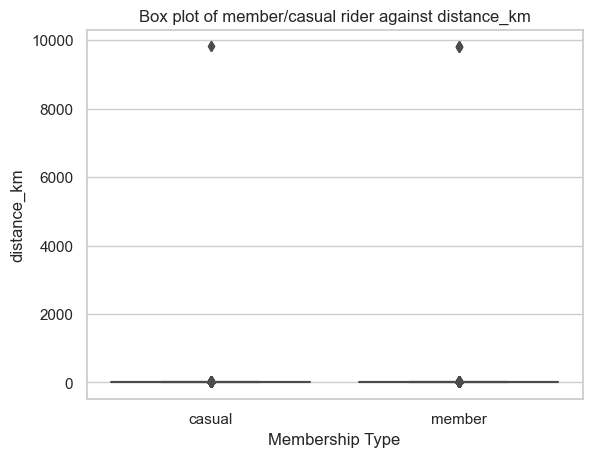

In [10]:
def plot_box(data, x, y, title, xlabel, ylabel):
    sns.boxplot(data=data, x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

x = 'member_casual'
num_cols = ['duration_in_mins', 'distance_km']
for col in num_cols:
    plot_box(data=df, x=x, y=col, title=f"Box plot of member/casual rider against {col}", xlabel="Membership Type", ylabel=f"{col}")


Based on the box plots above, it seems that there are some extreme values present in the dataset. Hence, we'll remove these outliers before plotting and verifying if the underlying distribution between member and casual riders are similar. 

In [11]:
num_cols = ['duration_in_mins', 'distance_km']
print(f'Shape of dataframe (before removal of outliers): {df.shape}')

for col in num_cols:
    # calculate mean and standard deviation
    mean = np.mean(df[col])
    std = np.std(df[col])

    # define the cut-off value for outliers (i.e., 3 std deviations)
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off

    # filter dataset to keep only the values with the lower and upper bounds
    df_removedoutliers = df[(df[col] > lower) & (df[col] < upper)]

print(f'Shape of dataframe (after removal of outliers): {df_removedoutliers.shape}')

Shape of dataframe (before removal of outliers): (5694352, 17)
Shape of dataframe (after removal of outliers): (5694339, 17)


In [12]:
# Reassign new dataframe to df 
df = df_removedoutliers

In [13]:
# Add one new feature to transform duration with log due to large values
df['duration_in_mins_log'] = np.log(df['duration_in_mins'])

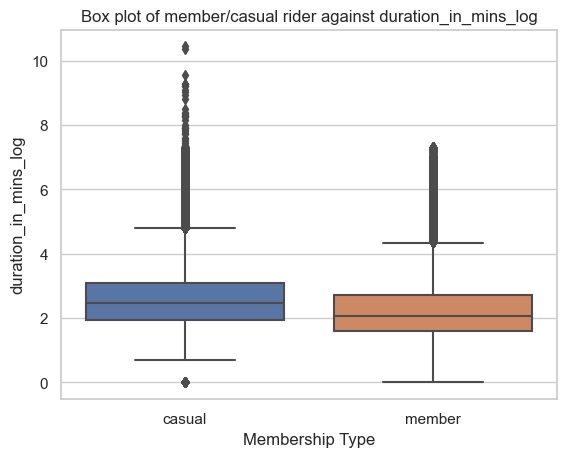

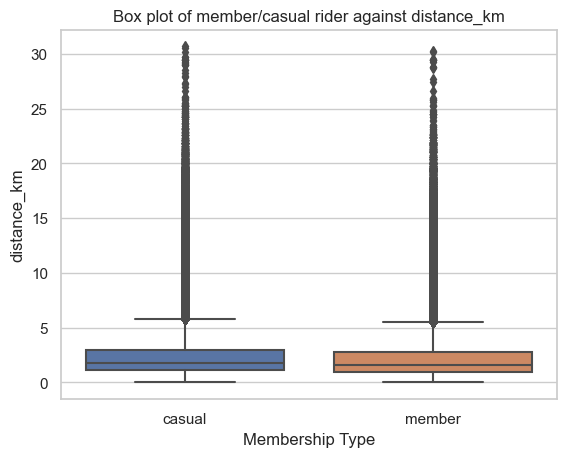

In [14]:
x = 'member_casual'
num_cols = ['duration_in_mins_log', 'distance_km']
for col in num_cols:
    plot_box(data=df, x=x, y=col, title=f"Box plot of member/casual rider against {col}", xlabel="Membership Type", ylabel=f"{col}")

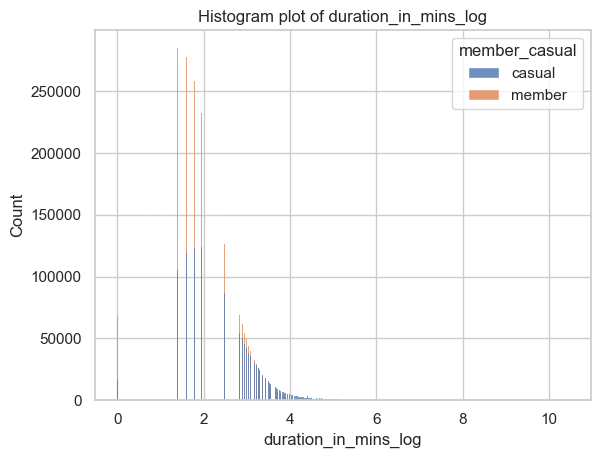

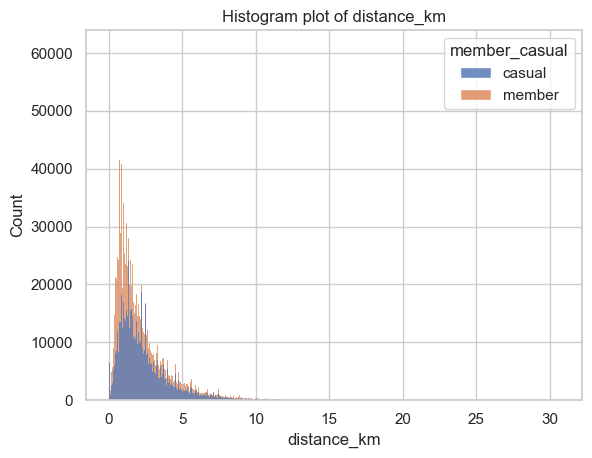

In [17]:
def plot_hist(data, x, hue, title, alpha):
    sns.histplot(data=data, x=x, hue=hue, alpha=alpha)
    plt.title(title)
    plt.show()

x = 'member_casual'
num_cols = ['duration_in_mins_log', 'distance_km']

for col in num_cols:
    plot_hist(data=df, x=col, hue=x, title=f"Histogram plot of {col}", alpha=0.8)